# Etude de features pour la séparation ds différentes catégories de type "Book"

Dans les premières classifications effectuées, nous avons eu des difficulté à séparer certaines catégories, notamment les suivantes:
| PrdTypeCode | Catégorie |
|-------|-------|
|10| Livres occasion|
|2280| Magazines occasion|
|2403| Livres BD magazines|
|2705| Livres neufs|

Ainsi, nous allos dans ce notebook chercher à identifier, à partir de designation et description, des features qui permettent de séparer ces classes, et tester une séparation de ces features pour ces catégories à partir d'algorithmes communs.

In [1]:
import numpy as np
import pandas as pd
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
# Récupérer le fichier parent en tant que BASE_DIR
BASE_DIR = "C:/Users/mangg/projects/rakutenteam"
os.chdir(BASE_DIR)

In [2]:
df = pd.read_csv("data/clean/X_train.csv", index_col=0)
target = pd.read_csv("data/clean/Y_train.csv", index_col=0)


In [3]:
from src.features.text.transformers.extractors import YearExtractor, NumberExtractor
from src.features.text.transformers.text_merger import TextMerger

In [ ]:
year_extractor = YearExtractor(text_column="designation")
years = year_extractor.fit_transform(df)
years.head()


In [6]:
book_codes = [10, 2280, 2403, 2705]
book_filter = target.prdtypecode.isin(book_codes)

In [ ]:
book_info = years.to_frame().join(target).loc[book_filter]
book_info["has_year"] = book_info.year.notnull()
book_info["book_type"] = book_info.prdtypecode.map({10: "Livres occasion", 2280: "Magazines occasion", 2403: "Livres BD magazines", 2705: "Livres neufs"})

In [ ]:
book_info.info()

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=book_info, x="book_type", hue="has_year")
plt.xticks(rotation=45)
plt.title("Présence d'année dans la designation des produits de type Livres en fonction de la catégorie de livre")
plt.xlabel("Catégorie de livre")
plt.show()

In [ ]:
import seaborn as sns
# Group the data by book type and extract the years

# Plot the boxplot using seaborn
sns.boxplot(data=book_info, x="book_type", y="year")
plt.xticks(rotation=45)
plt.xlabel("Book Type")
plt.ylabel("Year")
plt.xticks(rotation=45, )
plt.title("Boxplot of Years by Book Type")
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=book_info, x="year", hue="book_type", kde=True, bins=40, palette="viridis")
plt.title("Distribution of Years by Book Type")
plt.xlabel("Year")
plt.xlim(1850, 2025)
plt.show()

In [ ]:
from src.features.text.transformers.text_merger import TextMerger

merger = TextMerger(designation_column="designation", description_column="description", merged_column="full_description")
merged_text = merger.fit_transform(df)
df["full_description"] = merged_text


In [ ]:
full_description_years = df.full_description.str.extract(pattern, expand=False).rename("year").astype(float)

In [ ]:
full_book_info = full_description_years.to_frame().join(target).loc[book_filter]
full_book_info["has_year"] = full_book_info.year.notnull()
full_book_info["book_type"] = full_book_info.prdtypecode.map({10: "Livres occasion", 2280: "Magazines occasion", 2403: "Livres BD magazines", 2705: "Livres neufs"})

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=full_book_info, x="book_type", hue="has_year")
plt.xticks(rotation=45)
plt.title("Présence d'année dans la description globale des produits de type Livres en fonction de la catégorie de livre")
plt.xlabel("Catégorie de livre")
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=full_book_info, x="book_type", y="year")
plt.xticks(rotation=45)
plt.xlabel("Book Type")
plt.ylabel("Year")
plt.xticks(rotation=45, )
plt.title("Boxplot of Years by Book Type")
plt.show()

In [7]:
number_extractor = NumberExtractor(text_column="designation")
numbers = number_extractor.fit_transform(df)
numbers_info = numbers.to_frame().join(target).loc[book_filter]
numbers_info["book_type"] = numbers_info.prdtypecode.map({10: "Livres occasion", 2280: "Magazines occasion", 2403: "Livres BD magazines", 2705: "Livres neufs"})

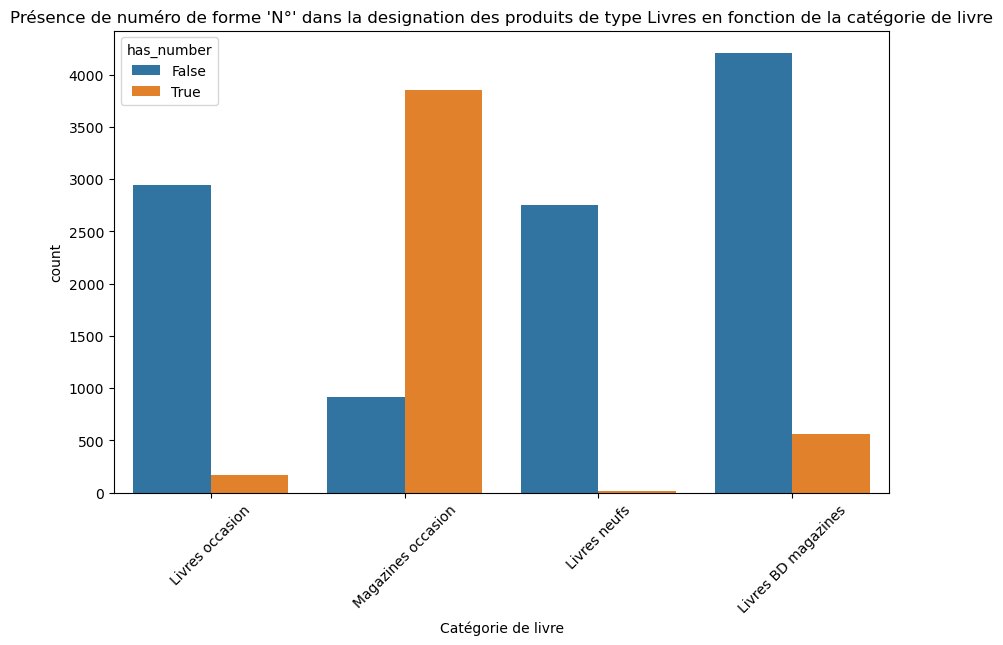

In [10]:


plt.figure(figsize=(10, 6))
sns.countplot(data=numbers_info, x="book_type", hue="has_number")
plt.xticks(rotation=45)
plt.title("Présence de numéro de forme 'N°' dans la designation des produits de type Livres en fonction de la catégorie de livre")
plt.xlabel("Catégorie de livre")
plt.show()


In [ ]:
full_mag_numbers = df.full_description.str.extract(mag_number_pattern, expand=False).rename("mag_number")

full_mag_number_info = full_mag_numbers.to_frame().join(target).loc[book_filter]
full_mag_number_info["has_mag_number"] = full_mag_number_info.mag_number.notnull()
full_mag_number_info["book_type"] = full_mag_number_info.prdtypecode.map({10: "Livres occasion", 2280: "Magazines occasion", 2403: "Livres BD magazines", 2705: "Livres neufs"})

plt.figure(figsize=(10, 6))
sns.countplot(data=full_mag_number_info, x="book_type", hue="has_mag_number")
plt.xticks(rotation=45)
plt.title("Présence de numéro de magazine dans la description globale des produits de type Livres en fonction de la catégorie de livre")
plt.xlabel("Catégorie de livre")
plt.show()

In [ ]:
hashtag_number_pattern = r"(#[\d\s\-]+)"
hashtags = df.full_description.str.extract(hashtag_number_pattern, expand=False).rename("hashtag_number")

hashtag_info = hashtags.to_frame().join(target).loc[book_filter]
hashtag_info["has_hashtag_number"] = hashtag_info.hashtag_number.notnull()
hashtag_info["book_type"] = hashtag_info.prdtypecode.map({10: "Livres occasion", 2280: "Magazines occasion", 2403: "Livres BD magazines", 2705: "Livres neufs"})

plt.figure(figsize=(10, 6))
sns.countplot(data=hashtag_info, x="book_type", hue="has_hashtag_number")
plt.xticks(rotation=45)
plt.title("Présence de hashtag dans la description globale des produits de type Livres en fonction de la catégorie de livre")
plt.xlabel("Catégorie de livre")
plt.show()

In [ ]:
df.full_description.loc[book_filter].to_list()

In [ ]:
complete_book_info = full_book_info.join(full_mag_number_info.has_mag_number).join(hashtag_info.has_hashtag_number)
complete_book_info

# Etude de corrélations

In [ ]:
import statsmodels.formula as smf
import statsmodels.api as sm
import scipy.stats as stats

## Etude de la corrélation entre la présence d'année et le type de livre

In [ ]:
contingency = pd.crosstab(complete_book_info.has_year, complete_book_info.book_type, colnames=["Type de livre"], rownames=["Présence d'année"])
contingency

In [ ]:
res = stats.chi2_contingency(contingency)
print(f"On obtient le résultat {res.statistic:.2f}, avec la p-value {res.pvalue:.4f}")

## Etude de la corrélation entre l'année détectée et le type de livre

In [ ]:
res = smf.api.ols("year ~ book_type", data=complete_book_info).fit()
table = sm.stats.anova_lm(res)
table

Noous pouvons ici valider l'hypothèse d'une corrélation entre l'année détectée et le type de livre avec une p-value très inférieure à 5%

## Etude de la corrélation entre la présence de numéro de magazine et le type de livre

In [ ]:
contingency = pd.crosstab(complete_book_info.has_mag_number, complete_book_info.book_type, colnames=["Type de livre"], rownames=["Présence de N°"])
contingency

In [ ]:
res = stats.chi2_contingency(contingency)
print(f"On obtient le résultat {res.statistic:.2f}, avec la p-value {res.pvalue:.4f}")

## Etude de la corrélation entre  présence de hashtag dans la description des produits et le type livre

In [ ]:
contingency = pd.crosstab(complete_book_info.has_hashtag_number, complete_book_info.book_type, colnames=["Type de livre"], rownames=["Présence de N°"])
contingency

In [ ]:
res = stats.chi2_contingency(contingency)
print(f"On obtient le résultat {res.statistic:.2f}, avec la p-value {res.pvalue:.4f}")

Les features créées semblent toutes cohérentes pour identifier les catégories, ce que nous allons tenter de faire par la suite.

## Préparation des données pour le modèle

### Séparation de data et target

In [ ]:
y = complete_book_info.prdtypecode
data = complete_book_info.drop(columns=["prdtypecode", "book_type"]).fillna(0)
data = data.astype(int)
data.describe().round(2)

### Scaling the data with MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
scaled_data.describe().round(2)

### Split the data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=42)

### Defining models to experiment with

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

In [ ]:
clf_svc = SVC(random_state=42)
clf_rf = RandomForestClassifier(random_state=42)
clf_lr = LogisticRegression(random_state=42)
clf_knn = KNeighborsClassifier()
clf_dum = DummyClassifier(random_state=42)

In [ ]:
svc_params = {"C": [0.1, 1, 10, 100], "gamma": [1, 0.1, 0.01, 0.001], "kernel": ["rbf", "poly", "sigmoid"]}
rf_params = {"n_estimators": [10, 100, 1000], "max_depth": [None, 5, 10, 20, 30], "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 2, 4]}
lr_params = {"C": [0.1, 1, 10, 100], "penalty": ["l1", "l2"]}
knn_params = {"n_neighbors": [3, 5, 11, 19], "weights": ["uniform", "distance"], "metric": ["euclidean", "manhattan"]}
dum_params = {"strategy": ["stratified", "most_frequent", "prior", "uniform"]}

In [ ]:
classifiers = [
    ("Dummy", clf_dum, dum_params),
    ("SVC", clf_svc, svc_params),
    ("Random Forest", clf_rf, rf_params),
    ("Logistic Regression", clf_lr, lr_params),
    ("KNN", clf_knn, knn_params),
    
]

In [ ]:
results = pd.DataFrame(columns=["Accuracy"], index=["Dummy", "SVC", "Random Forest", "Logistic Regression", "KNN"])


In [ ]:
for name, clf, params in classifiers:
    print (f"Training {name}...")
    grid = GridSearchCV(clf, params, cv=4, n_jobs=-1, verbose=1, scoring="accuracy")
    grid.fit(X_train, y_train)
    print(f"Meilleurs paramètres pour {name}: {grid.best_params_}")
    print(f"Meilleur score pour {name}: {grid.best_score_:.3f}")
    test_score = grid.score(X_test, y_test)
    print(f"Score sur le test set pour {name}: {test_score:.3f}")
    results.loc[name, "Accuracy"] = test_score

In [ ]:
results